In [1]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score

import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [2]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

reload(dr_datasets)
boosted_faces, _ = dr_datasets.get_faces_boosted_best_features()

In [3]:
reload(common)
n = boosted_faces.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(boosted_faces, n)

For n_clusters = 2 average silhouette_score: 0.13969362869437296 time taken: 0.09035372734069824s
For n_clusters = 3 average silhouette_score: 0.10374842913925733 time taken: 0.10791754722595215s
For n_clusters = 4 average silhouette_score: 0.10574373703788381 time taken: 0.13101959228515625s
For n_clusters = 5 average silhouette_score: 0.1063854053739478 time taken: 0.20656657218933105s
For n_clusters = 6 average silhouette_score: 0.10026668633908031 time taken: 0.13910579681396484s
For n_clusters = 7 average silhouette_score: 0.09750569042061451 time taken: 0.195756196975708s
For n_clusters = 8 average silhouette_score: 0.09746005455255981 time taken: 0.15999269485473633s
For n_clusters = 9 average silhouette_score: 0.08959995559653051 time taken: 0.1563105583190918s
For n_clusters = 10 average silhouette_score: 0.07566016746559288 time taken: 0.1722710132598877s
For n_clusters = 11 average silhouette_score: 0.07556797518706242 time taken: 0.18599843978881836s
For n_clusters = 12 ave

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


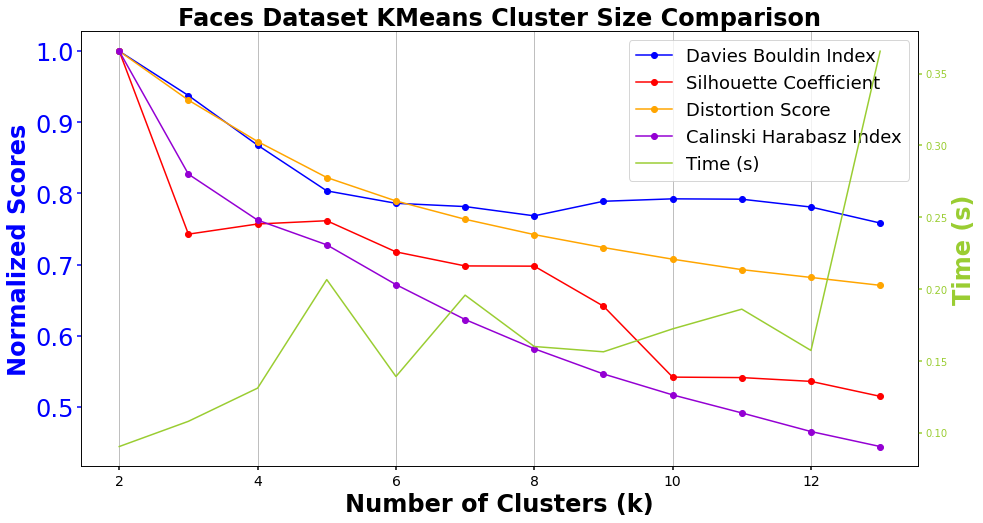

In [4]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


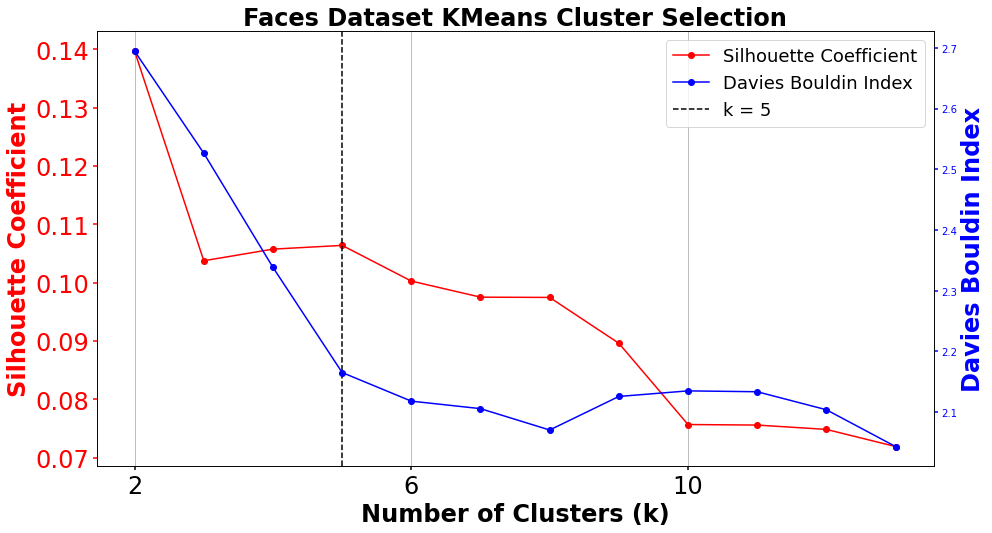

In [28]:
reload(common)
best_k = 5
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 5 average silhouette_score: 0.1063854053739478 time taken: 0.20370745658874512s


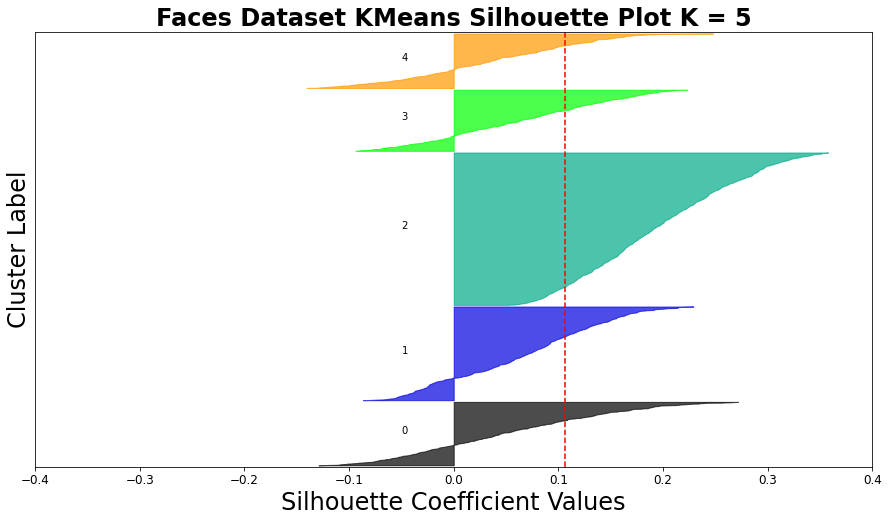

In [29]:
reload(common)
common.plot_silhouette_kmeans(boosted_faces, best_k, DATASET, xlim=[-0.4, 0.4])

In [30]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(boosted_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
Boosted_faces_km = pd.DataFrame(boosted_faces.copy())
Boosted_faces_km['km_labels'] = km.labels_
Boosted_faces_km_vis = Boosted_faces_km.copy()
Boosted_faces_km_vis['sex'] = y_train_faces['sex']
Boosted_faces_km_vis['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(boosted_faces, km.labels_)))

Time Taken 0.2457892894744873 s
homogeneity_score sex:  0.0005066596855529505
homogeneity_score race:  0.002322306925587066
Silhouette Score: 0.1063854053739478


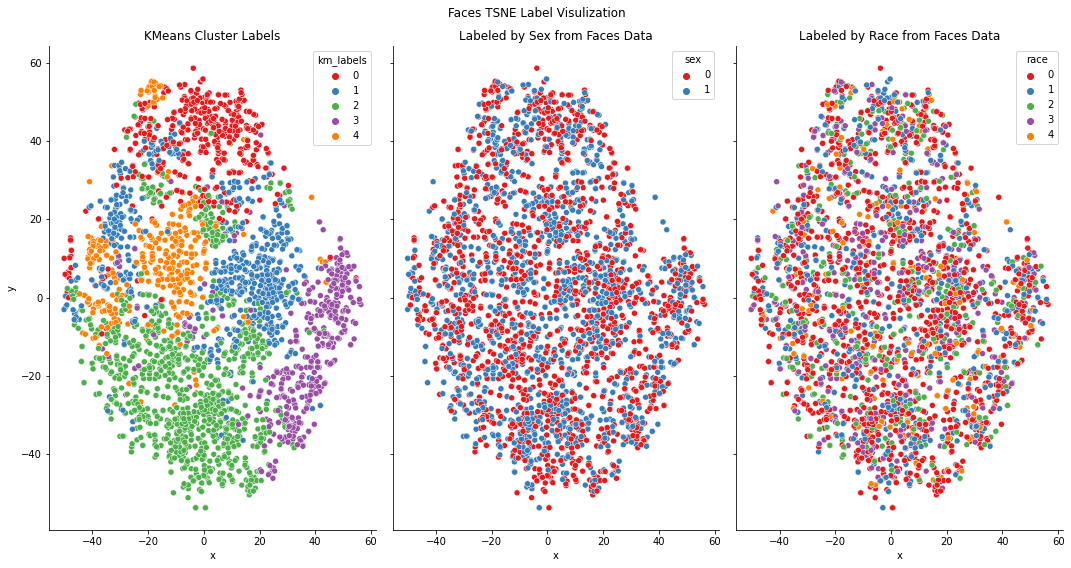

In [9]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(boosted_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

In [11]:
print(Boosted_faces_km_vis)

      Feature_5  Feature_10  Feature_14  Feature_25  Feature_34  Feature_54  \
2904   0.522978    0.384653    0.412709    0.408248    0.357829    0.422026   
2334   0.435963    0.392577    0.408248    0.437765    0.408248    0.430288   
2541   0.639522    0.265241    0.301864    0.408248    0.476772    0.431639   
1880   0.172787    0.180929    0.473883    0.192963    0.570483    0.408248   
167    0.408248    0.418227    0.631508    0.408248    0.421194    0.314862   
...         ...         ...         ...         ...         ...         ...   
482    0.459985    0.411647    0.408248    0.408248    0.476569    0.438542   
344    0.436686    0.425418    0.408248    0.388679    0.557612    0.412129   
113    0.450658    0.408248    0.241885    0.448975    0.247950    0.408248   
2778   0.476006    0.355679    0.435635    0.094782    0.490358    0.408248   
1391   0.492002    0.202828    0.408248    0.191139    0.408248    0.408248   

      Feature_57  Feature_76  Feature_103  Feature_

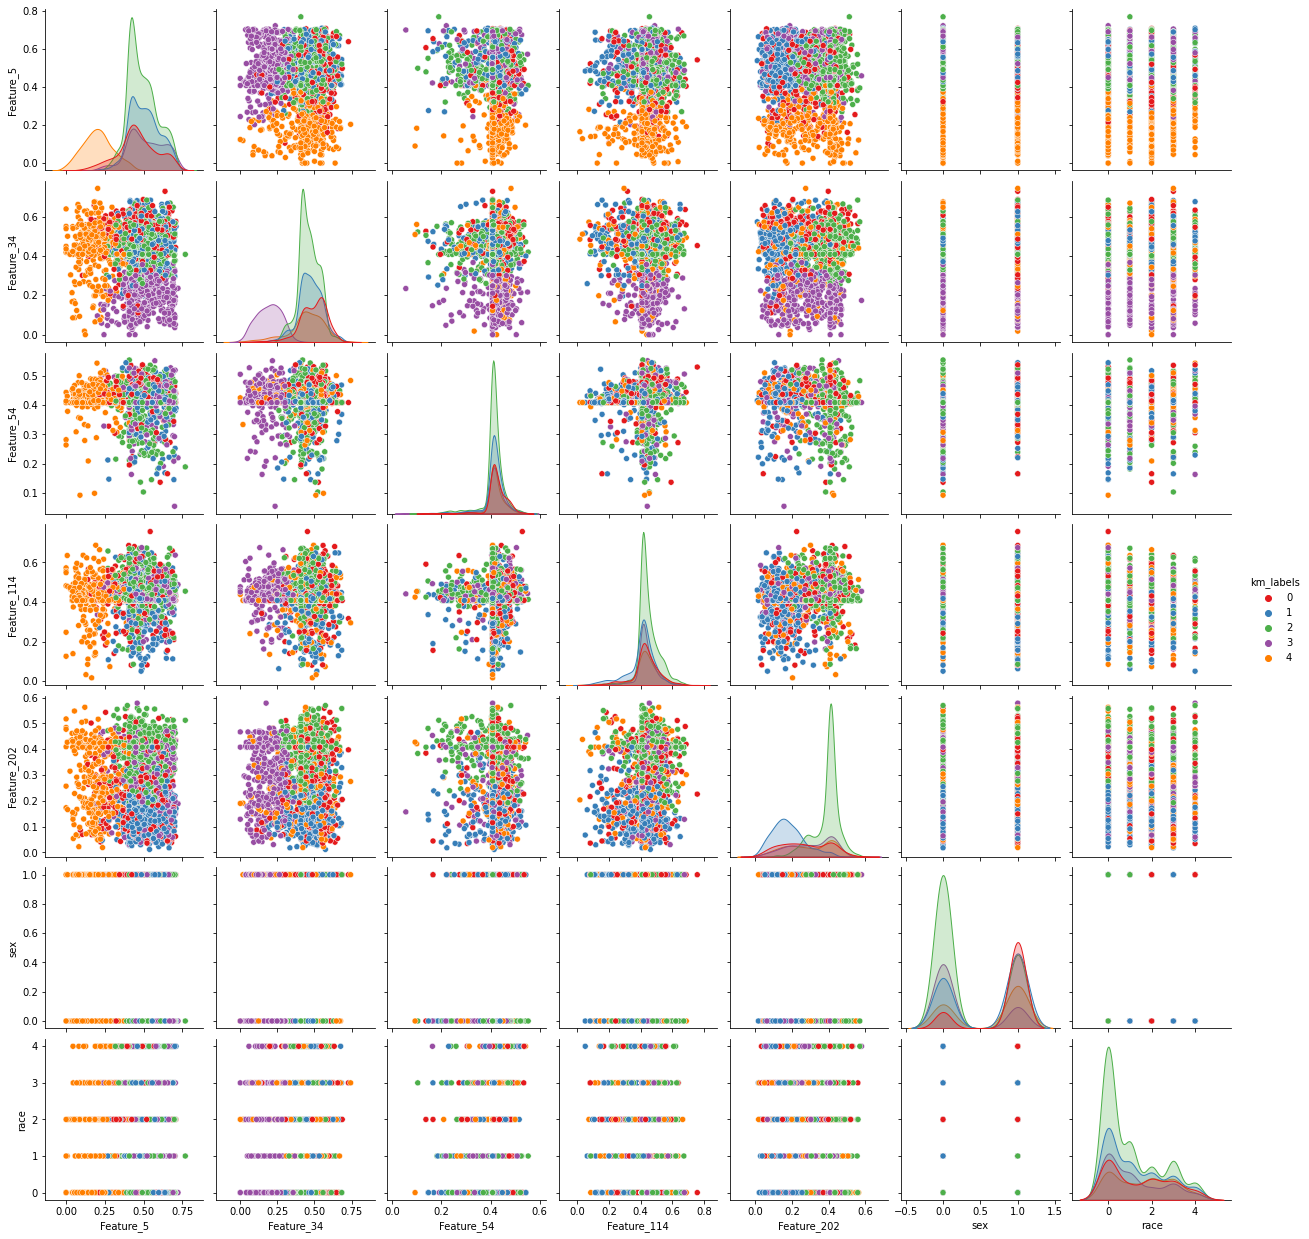

In [13]:
sns.pairplot(Boosted_faces_km_vis[["Feature_5", "Feature_34", "Feature_54", "Feature_114", "Feature_202", "sex", "race", "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [14]:
reload(common)
em_n = boosted_faces.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(boosted_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.0524387836675692 time taken: 0.3647925853729248s
For n_clusters = 3 average silhouette_score: -0.017250366935908083 time taken: 0.516747236251831s
For n_clusters = 4 average silhouette_score: -0.03365894266181518 time taken: 0.6371345520019531s
For n_clusters = 5 average silhouette_score: -0.07568891546951372 time taken: 1.4133586883544922s
For n_clusters = 6 average silhouette_score: -0.06828861525906023 time taken: 0.5686519145965576s
For n_clusters = 7 average silhouette_score: -0.0981222747663073 time taken: 0.9116547107696533s
For n_clusters = 8 average silhouette_score: -0.07958891240213314 time taken: 1.7768471240997314s
For n_clusters = 9 average silhouette_score: -0.07288051386002525 time taken: 2.296151876449585s
For n_clusters = 10 average silhouette_score: -0.0866881020413788 time taken: 3.7122175693511963s
For n_clusters = 11 average silhouette_score: -0.0925098512270366 time taken: 2.1789207458496094s
For n_clusters = 12 aver

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


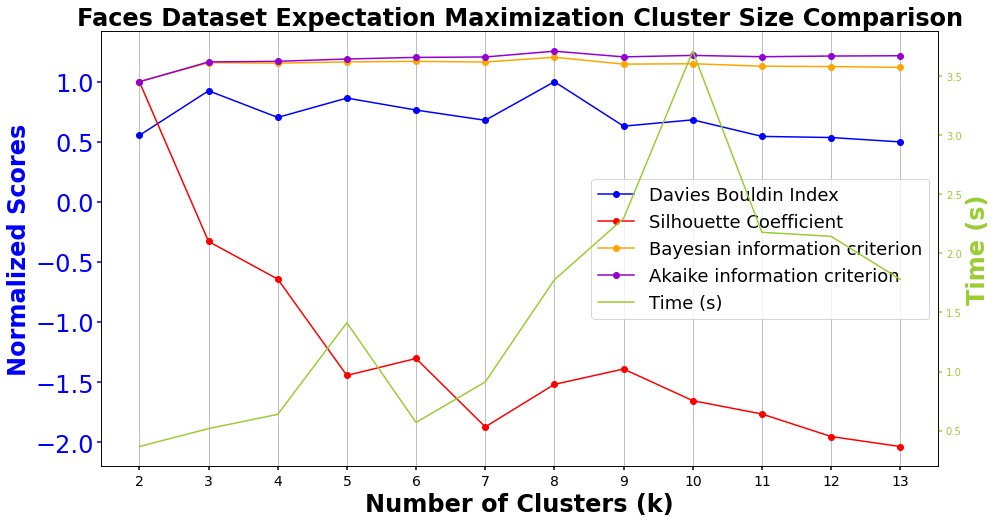

In [31]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


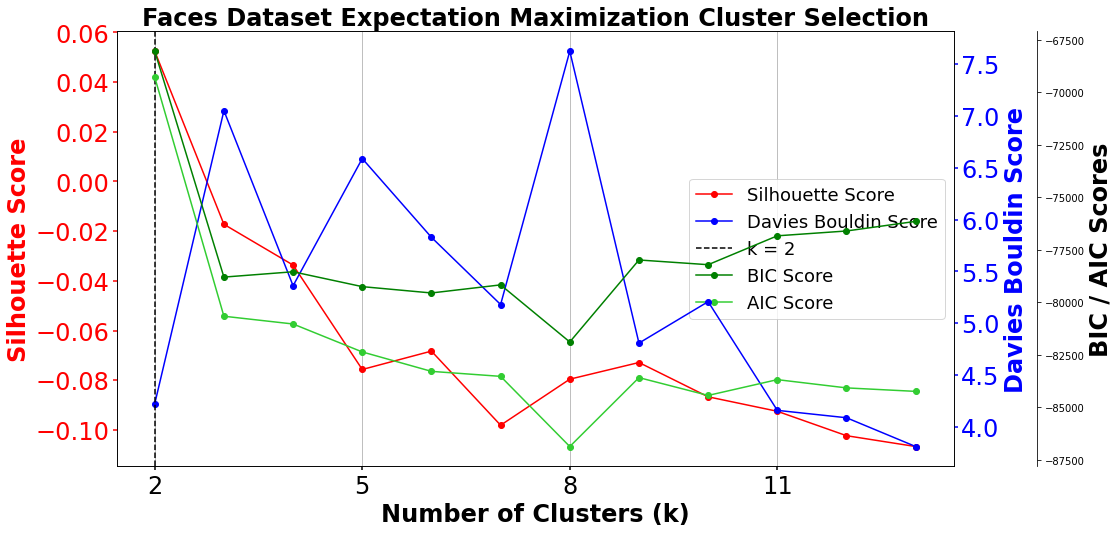

In [32]:
reload(common)
best_k = 2
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=3)

For n_clusters = 2 average silhouette_score: 0.0524387836675692 time taken: 0.47599077224731445s


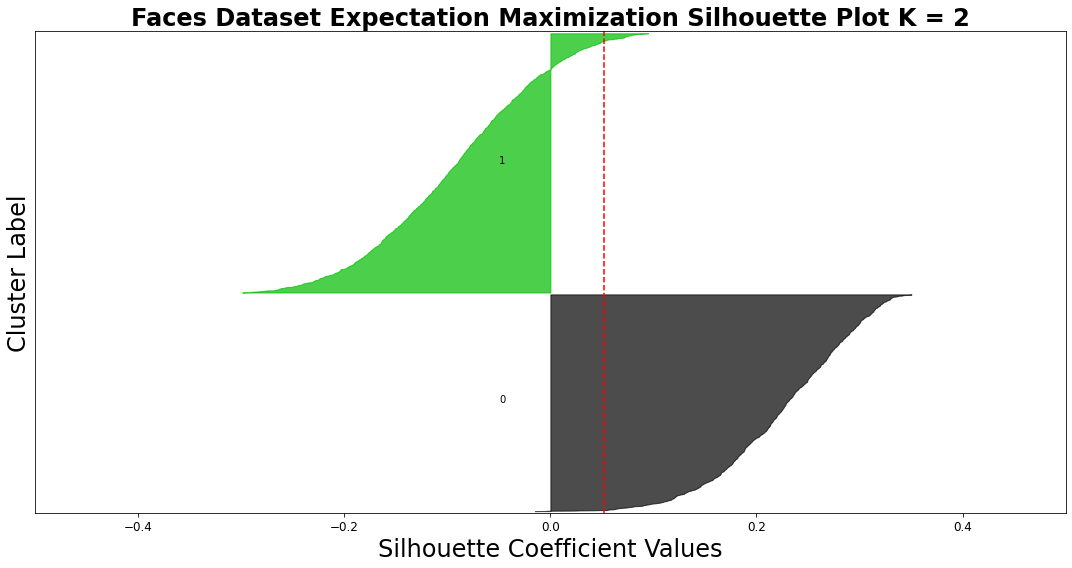

In [33]:
reload(common)
best_k=2
common.plot_silhouette_em(boosted_faces, best_k, DATASET, xlim=[-0.5, 0.5])

In [34]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(boosted_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(boosted_faces)
boosted_faces_gm = pd.DataFrame(boosted_faces.copy())
boosted_faces_gm['em_labels'] = em_model.predict(boosted_faces)

boosted_faces_gm_vis = boosted_faces_gm.copy()
boosted_faces_gm_vis['sex'] = y_train_faces['sex']
boosted_faces_gm_vis['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(boosted_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(boosted_faces), y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(boosted_faces, em_model.predict(boosted_faces))))

time taken 0.38208818435668945 s
homogeneity_score sex:  0.0009190814785400392
homogeneity_score race:  0.0013768046294606506
Silhouette Score: 0.05242601038890881


In [21]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(boosted_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

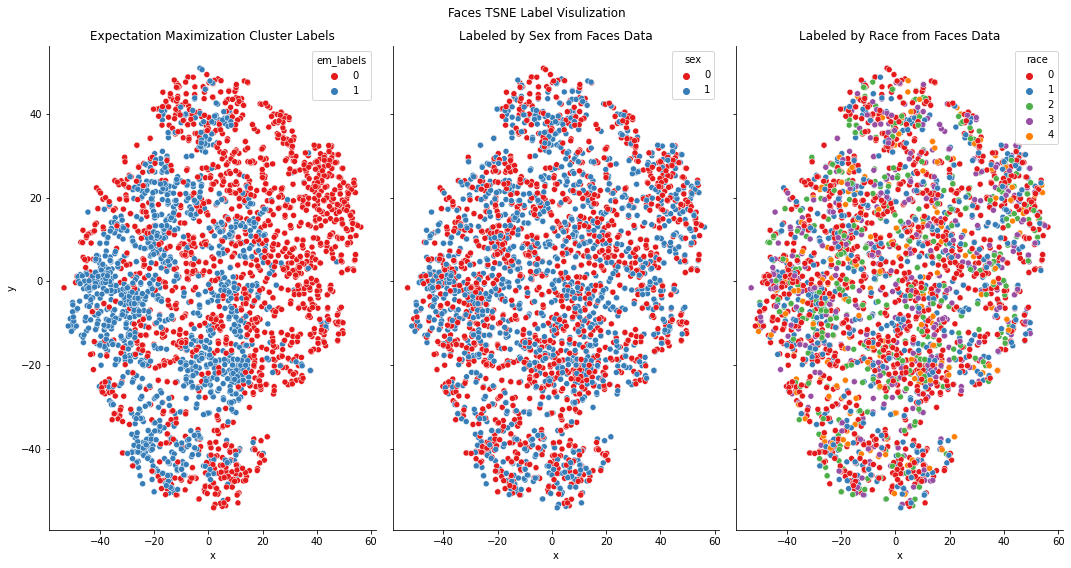

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

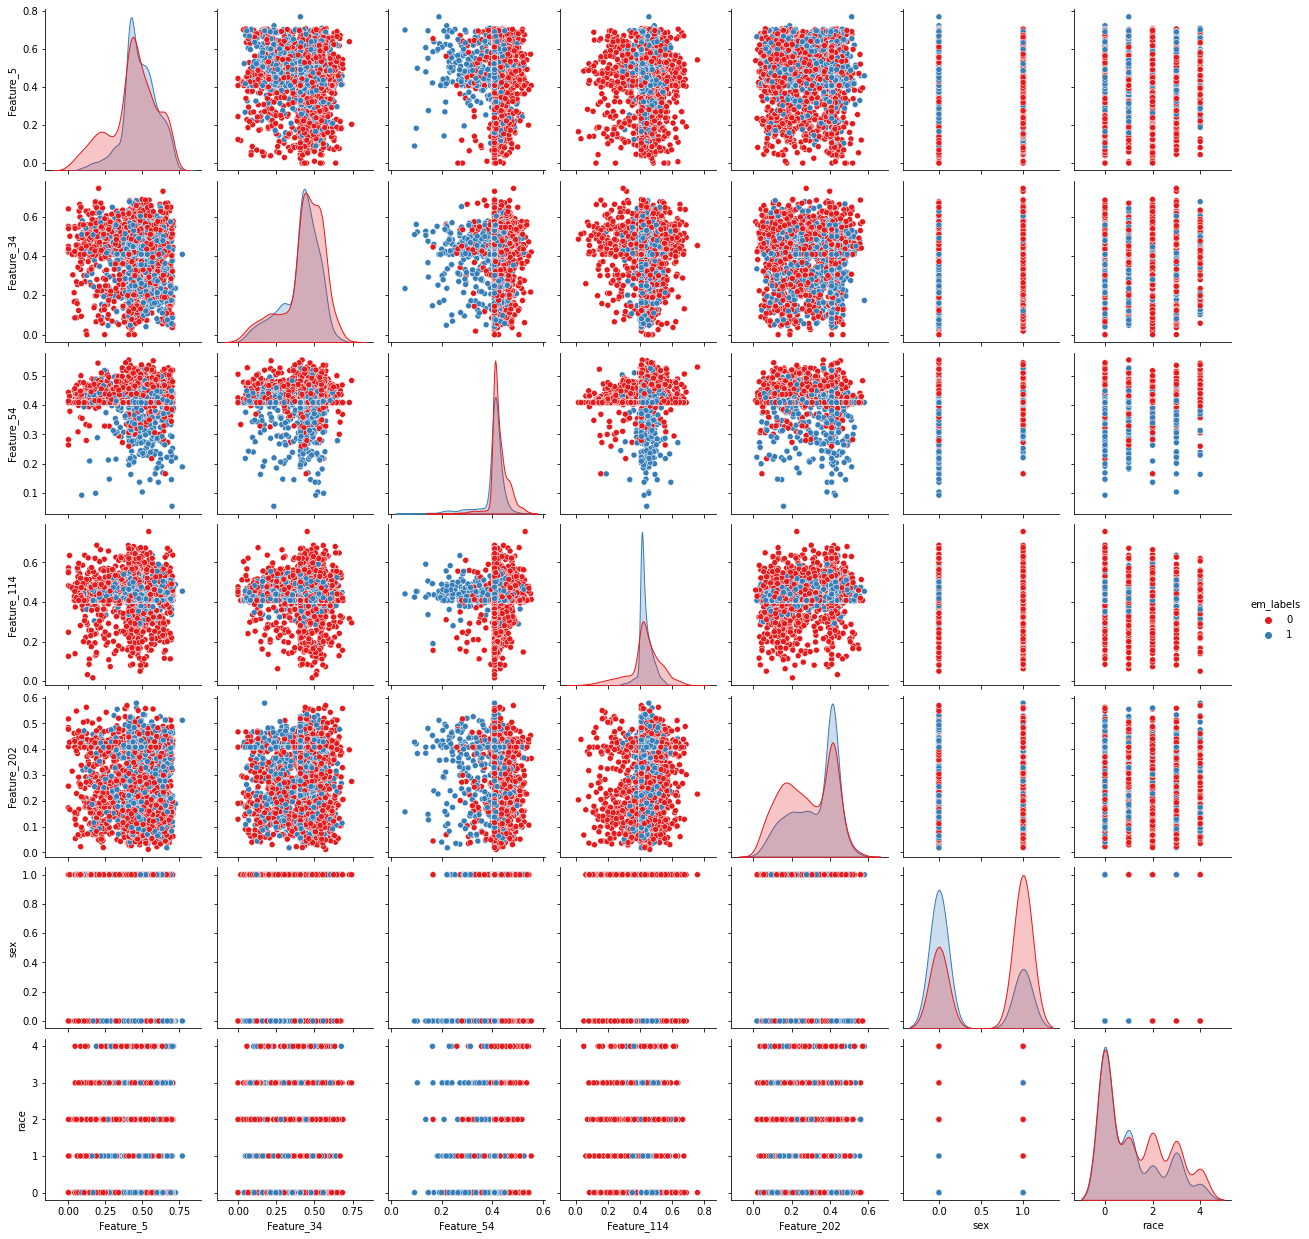

In [25]:
sns.pairplot(boosted_faces_gm_vis[["Feature_5", "Feature_34", "Feature_54", "Feature_114", "Feature_202", "sex", "race", "em_labels"]], hue="em_labels", palette="Set1")